In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 5.0)

## Load Data From Preprocessed Data csv

In [2]:
df = pd.read_csv('../data/bitstamp_minute_data.csv', sep=',')
df.sort_values(by=['year', 'month', 'day_of_month', 'hour', 'minute'], inplace=True)
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,datetime,datetime_pandas,day_of_month,month,year,weekday,week,hour,minute
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00,2011-12-31 07:52:00,31,12,2011,5,52,7,52
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:53:00,2011-12-31 07:53:00,31,12,2011,5,52,7,53
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:54:00,2011-12-31 07:54:00,31,12,2011,5,52,7,54
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:55:00,2011-12-31 07:55:00,31,12,2011,5,52,7,55
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:56:00,2011-12-31 07:56:00,31,12,2011,5,52,7,56


## DataFrame Size Analysis

In [3]:
print "Data Frame Rows : %s, Features : %s" % df.shape
print "Data Rows available for minute-by-minute forecasting : %s" % df.shape[0]
hour_df = df[['Close', 'year', 'month', 'day_of_month', 'hour']].groupby(['year', 'month', 'day_of_month', 'hour']).sum()  
print "Data Rows available for hour-by-hour forecasting : %s" % hour_df.shape[0]

Data Frame Rows : 3161057, Features : 17
Data Rows available for minute-by-minute forecasting : 3161057
Data Rows available for hour-by-hour forecasting : 52687


## Price Trend By Year and Month

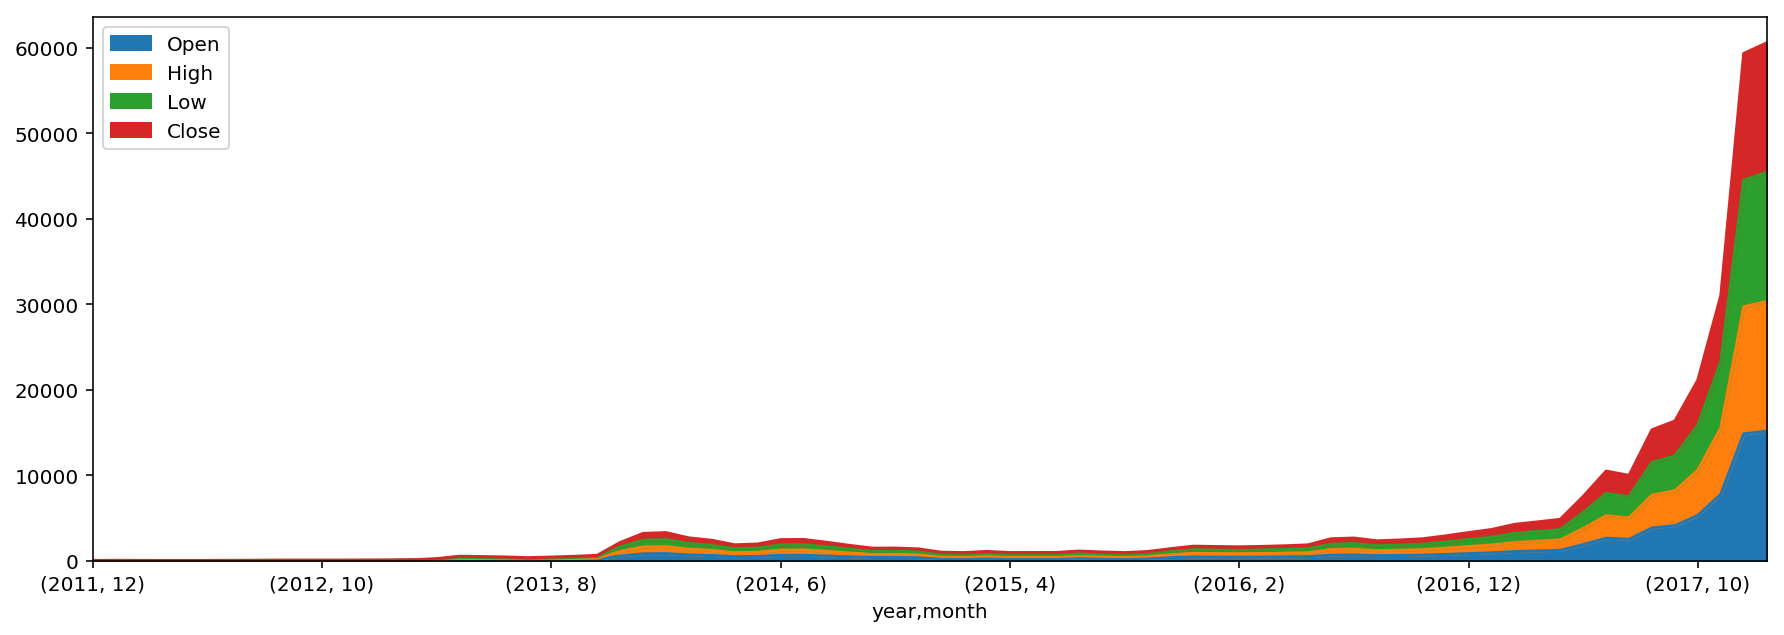

In [4]:
df[['Open', 'High', 'Low', 'Close', 'year', 'month']].groupby(['year','month']).mean().plot(kind='area')

## BitCoin Volume trend over year and month

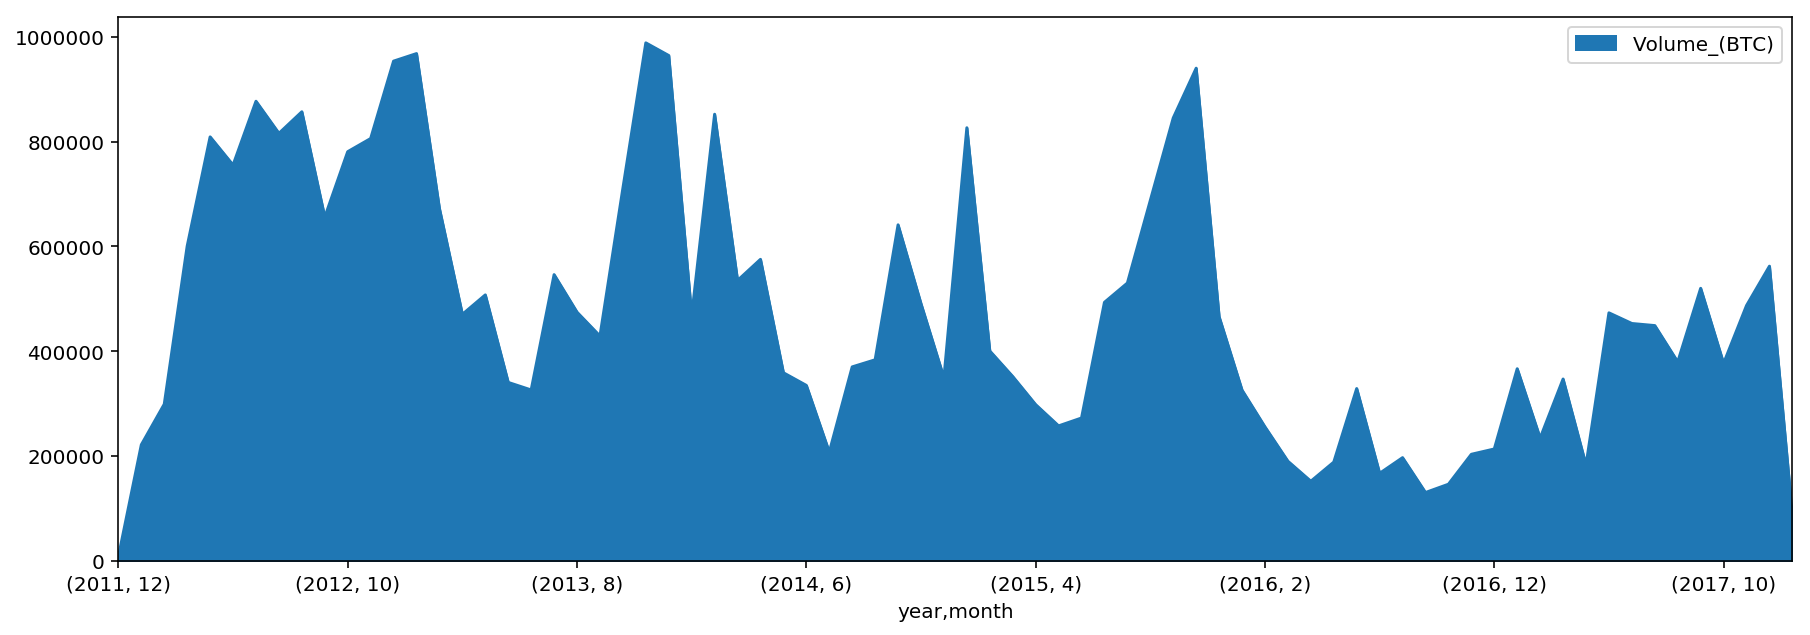

In [5]:
df[['Volume_(BTC)', 'year', 'month']].groupby(['year','month']).sum().plot(kind='area')

## Total volume of real money invested in BitCoin per year & month

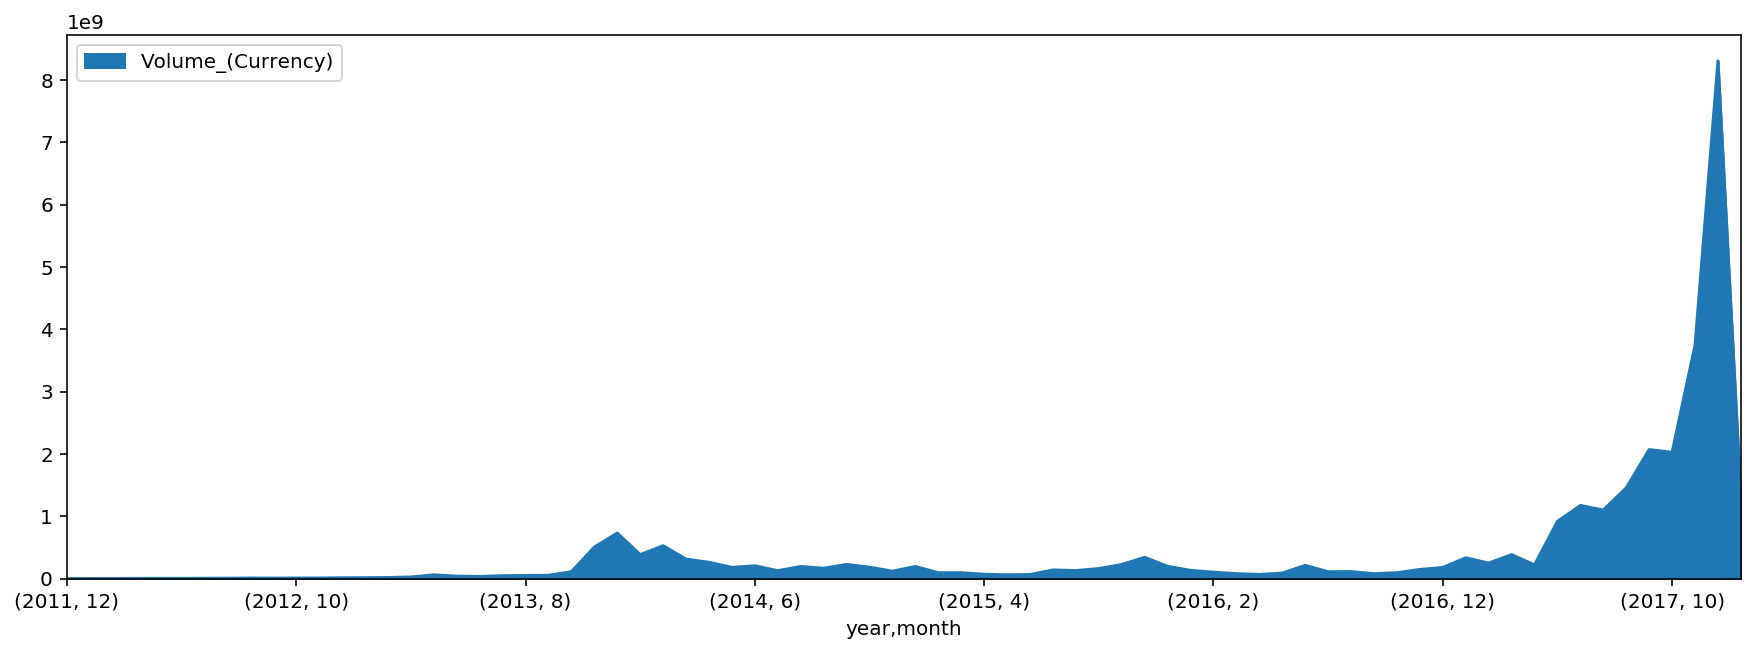

In [6]:
df[['Volume_(Currency)', 'year', 'month']].groupby(['year','month']).sum().plot(kind='area')

## Average Weighted price per year & month

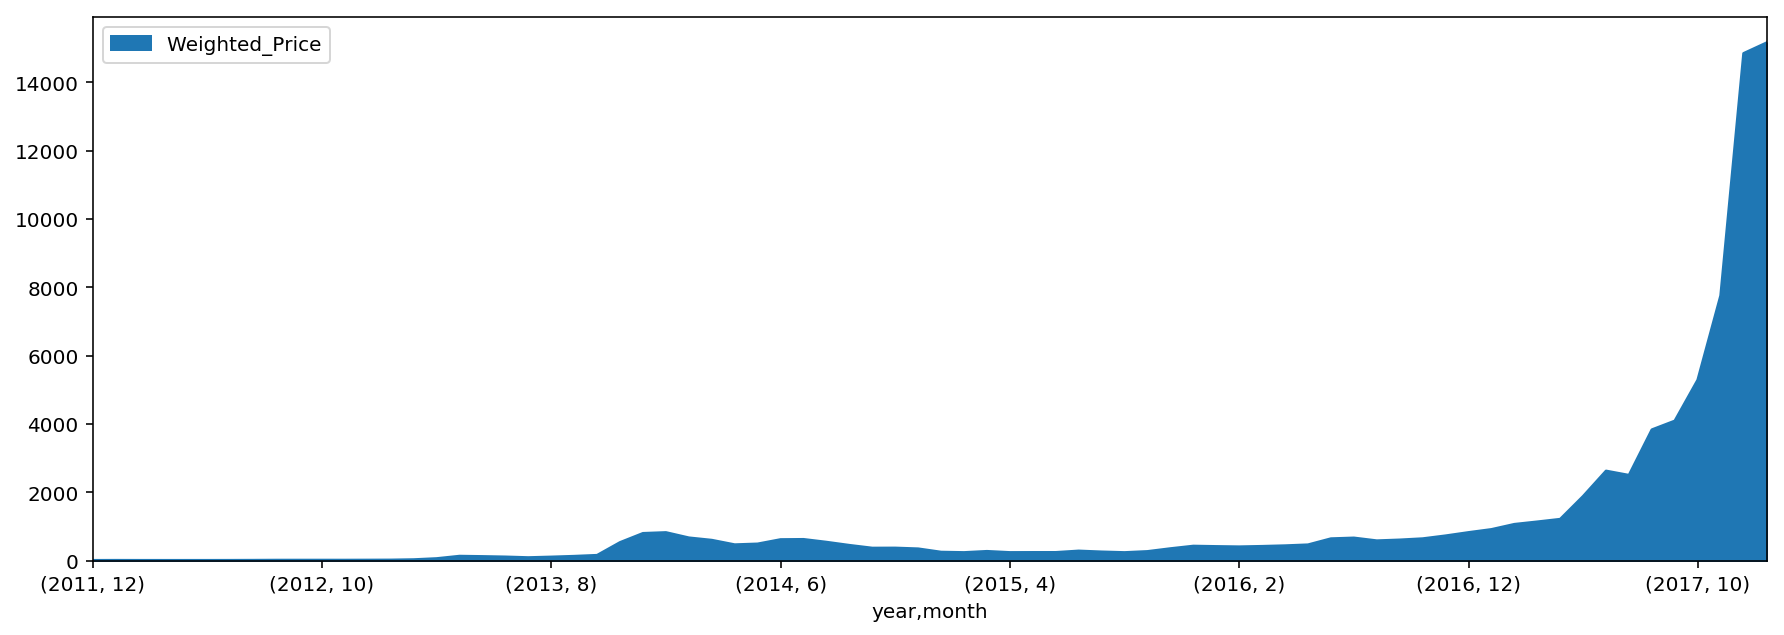

In [7]:
df[['Weighted_Price', 'year', 'month']].groupby(['year','month']).mean().plot(kind='area')

## Yearly Average price trend

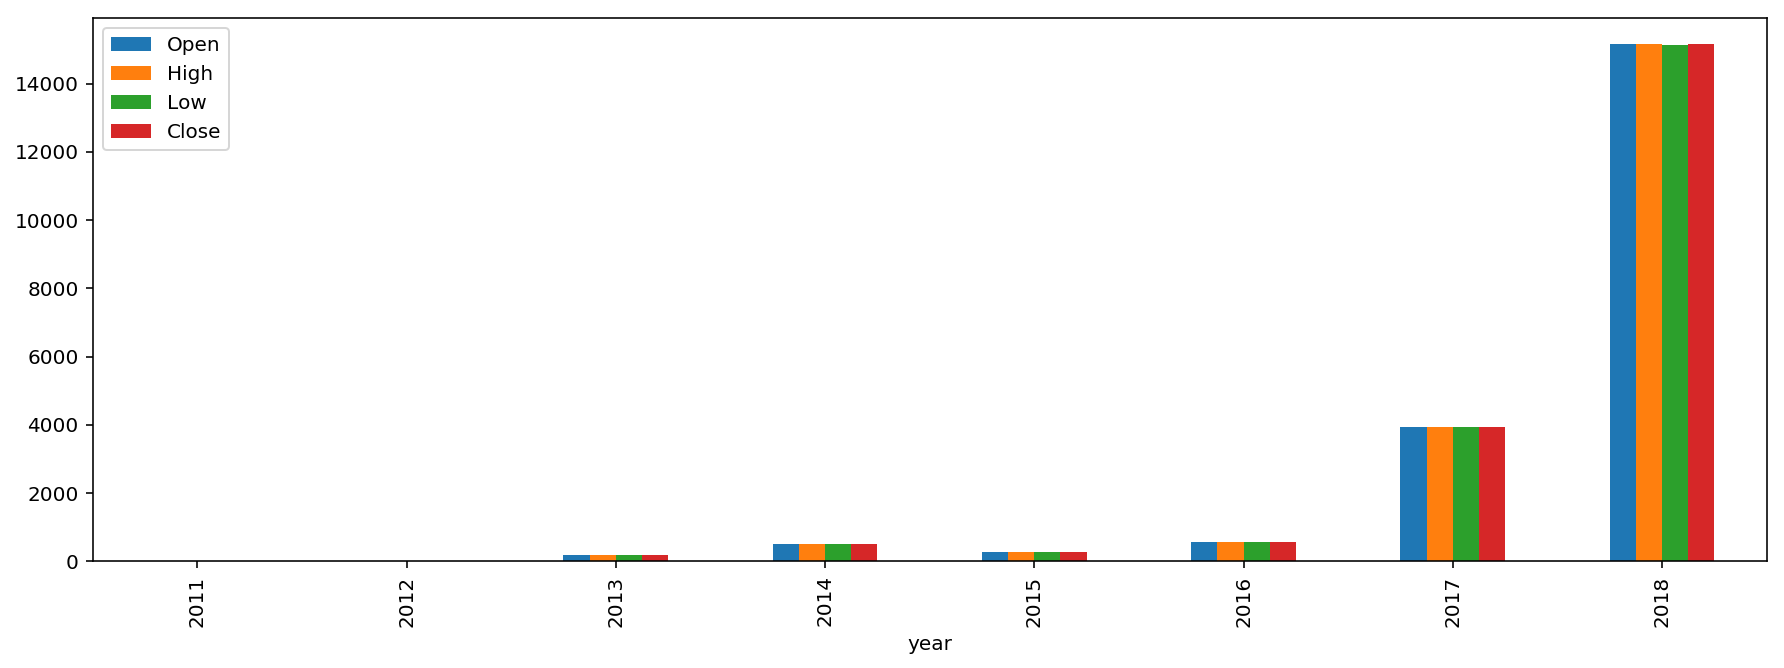

In [8]:
df[['Open', 'High', 'Low', 'Close', 'year']].groupby(['year']).mean().plot(kind='bar')

## Monthly Average price trend

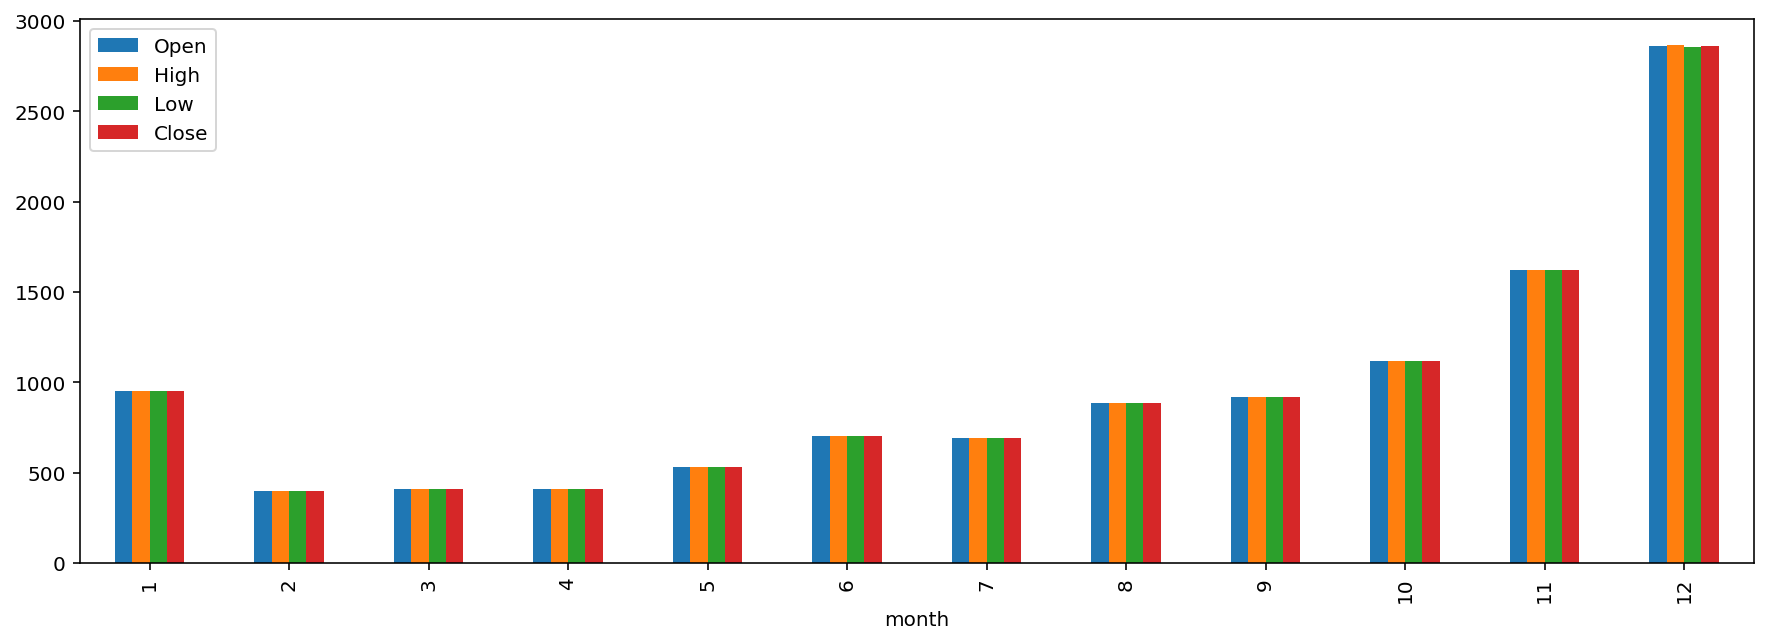

In [9]:
df[['Open', 'High', 'Low', 'Close', 'month']].groupby(['month']).mean().plot(kind='bar')

## Weekday Average price trend

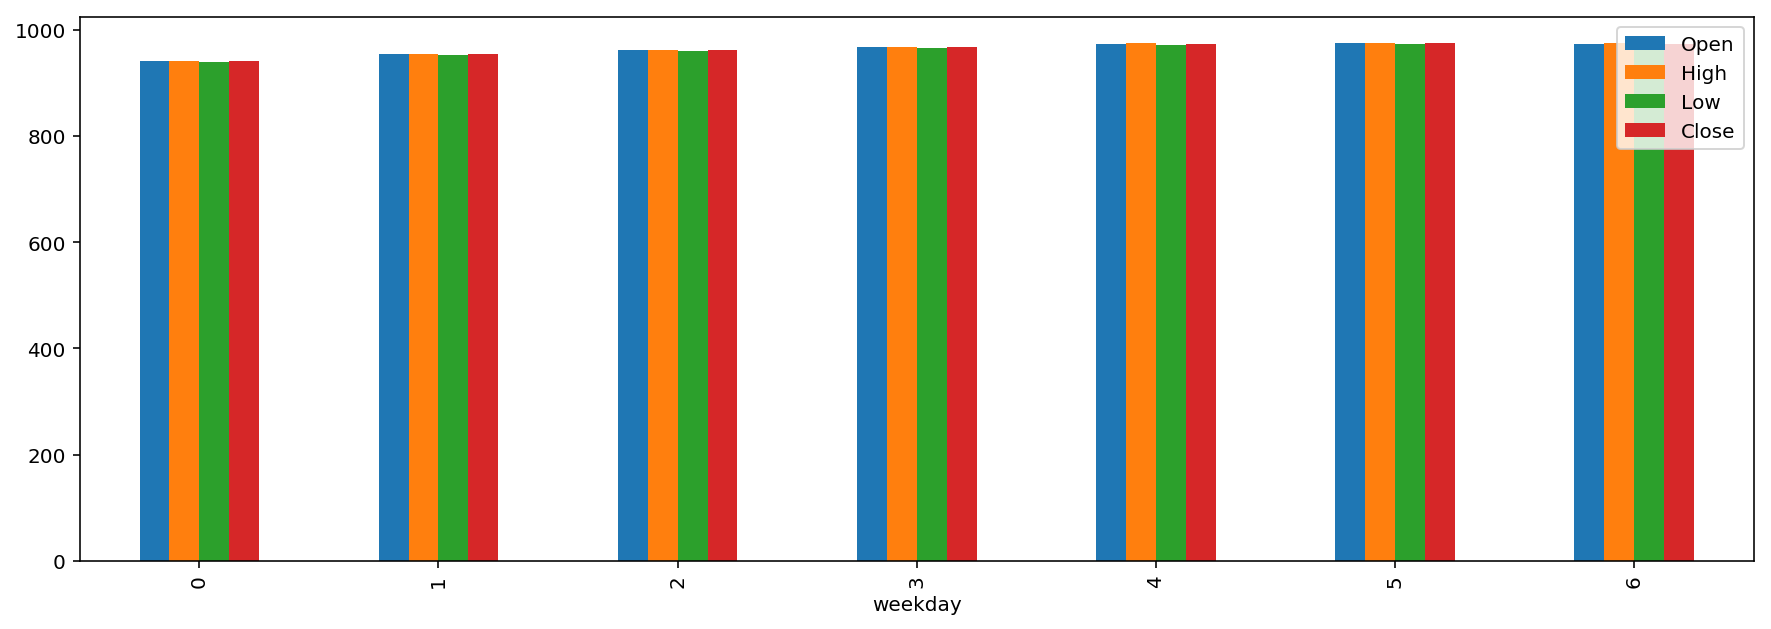

In [10]:
df[['Open', 'High', 'Low', 'Close', 'weekday']].groupby(['weekday']).mean().plot(kind='bar')